<a href="https://colab.research.google.com/github/victorious07/Classification_Capstone_Project/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Cardiovascular Risk Prediction </u></b>

##**Problem Description**

### The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patient's information. It includes over 4,000 records and 15 attributes.





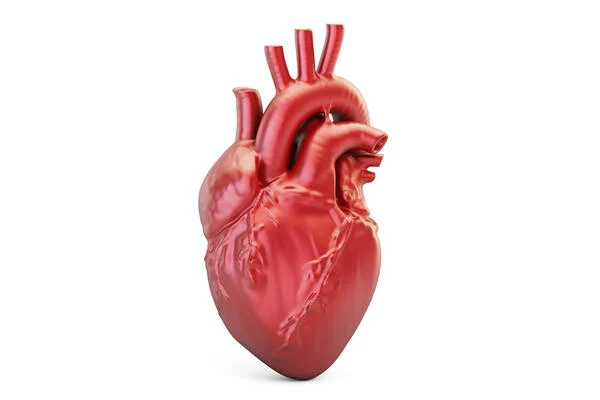

## <u>**Data Description**</u><br><br>
### **Variables:**<br>
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

###**Demographic:**<br>
* <font color = green>**Sex:**</font> male or female("M" or "F")
* <font color = green>**Age:**</font> Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

###**Behavioral:**<br>
* <font color = 'green'>**is_smoking**:</font> whether or not the patient is a current smoker ("YES" or "NO")
* <font color = 'green'>**Cigs Per Day:**</font> the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

###**Medical( history):**<br>
* <font color = 'green'> **BP Meds:**</font> whether or not the patient was on blood pressure medication (Nominal)
* <font color = 'green'> **Prevalent Stroke:**</font> whether or not the patient had previously had a stroke (Nominal)
* <font color = 'green'> **Prevalent Hyp:**</font> whether or not the patient was hypertensive (Nominal)
* <font color = 'green'> **Diabetes:**</font> whether or not the patient had diabetes (Nominal)

###**Medical(current):**<br>
* <font color = 'green'> **Tot Chol:**</font> total cholesterol level (Continuous)
* <font color = 'green'> **Sys BP:**</font> systolic blood pressure (Continuous)
* <font color = 'green'> **Dia BP:**</font> diastolic blood pressure (Continuous)
* <font color = 'green'>**BMI:**</font> Body Mass Index (Continuous)
* <font color = 'green'>**Heart Rate:**</font> heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* <font color = 'green'>**Glucose:**</font> glucose level (Continuous)

###**Predict variable (desired target):**<br>
 10-year risk of <font color = 'green'>**coronary heart disease CHD**</font>(binary: “1”, means “Yes”, “0” means “No”) -
DV

## **Importing Libraries**

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
sns.set_style('darkgrid')
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## **Data Inspection**

In [2]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#read csv file
file_path ='/content/drive/MyDrive/Classification_Capstone_Project/'
cardio_df = pd.read_csv(file_path + 'data_cardiovascular_risk.csv')

In [4]:
#first five rows
cardio_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
#last five rows
cardio_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
#shape
cardio_df.shape

(3390, 17)

In [7]:
#info
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

**Checking Duplicate Data**

In [8]:
#checking duplicate value in the given dataset
cardio_df.duplicated().sum()

0

**Missing Values and Percentage**

In [9]:
#calculating no.of missing values
df1 = cardio_df.isnull().sum().reset_index().rename(columns={'index':'column_name', 0:'no.of_missing'})

#calculating missing percentage
percent_missing = cardio_df.isnull().sum() * 100 / len(cardio_df)
df2 = percent_missing.reset_index().rename(columns={'index':'column_name', 0:'missing_percentage'}).round(2)

#merging dataframes on column_name
missing_value_df = df1.merge(df2,on='column_name')

In [10]:
#missing value and their percentage
missing_value_df

,column_name,no.of_missing,missing_percentage
0,id,0,0.00
1,age,0,0.00
2,education,87,2.57
3,sex,0,0.00
4,is_smoking,0,0.00
5,cigsPerDay,22,0.65
6,BPMeds,44,1.30
7,prevalentStroke,0,0.00
8,prevalentHyp,0,0.00
9,diabetes,0,0.00


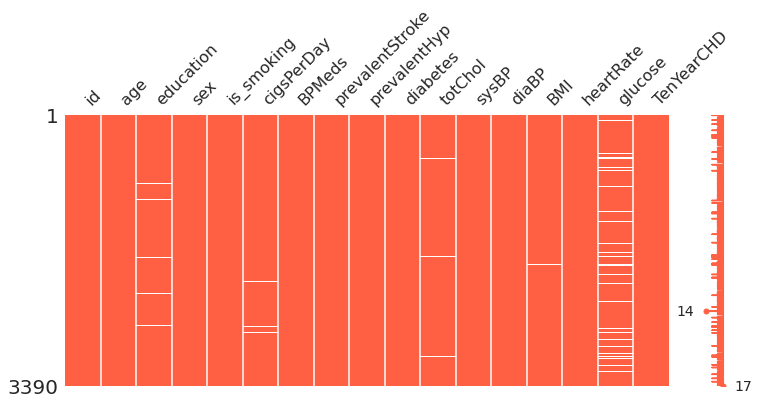

In [11]:
#msno.bar(cardio_df, color="dodgerblue", sort="ascending",figsize=(12,5))
#msno.dendrogram(cardio_df,figsize=(12,5))

msno.matrix(cardio_df,figsize=(12,5),color=(1, 0.38, 0.27))          #missing value visualization

**Droping columns**

In [12]:
#droping unnecessary columns
cardio_df.drop(['id','education'],axis=1,inplace=True)

In [13]:
#first five rows after droping unnecessary columns
cardio_df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


**Relplacing Nan Values with Median**

In [14]:
#replacing glucose nan value with median
cardio_df['glucose'].fillna(cardio_df['glucose'].median(),inplace=True)

In [15]:
cardio_df.isnull().sum()

age                 0
sex                 0
is_smoking          0
cigsPerDay         22
BPMeds             44
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            38
sysBP               0
diaBP               0
BMI                14
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

**Creating copy**

In [16]:
#creating the copy of dataframe
cardiovascular_risk = cardio_df.copy()

**Dropping Nan Value**

In [17]:
#dropping nan value
cardiovascular_risk.dropna(inplace=True)

In [18]:
#first five rows after dropping nan value
cardiovascular_risk.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


**Unique Values**

In [19]:
#columns list
col_lst = ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

In [20]:
#unique element function
def unique_element(columns):
  for col_name in columns:
    print(f'{col_name} : {cardiovascular_risk[col_name].unique()}\n')    #getting unique element of each columns list

unique_element(col_lst)                                                  #function calling

sex : ['M' 'F']

is_smoking : ['NO' 'YES']

BPMeds : [0. 1.]

prevalentStroke : [0 1]

prevalentHyp : [1 0]

diabetes : [0 1]



**Data Description**

In [21]:
#Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame
cardio_df.describe()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3390.000000,3390.000000
mean,49.542183,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,81.720059,0.150737
std,8.592878,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,23.161265,0.357846
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,72.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,85.000000,0.000000
max,70.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


## **Data Analysis**

**Target Variable**

In [22]:
#10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)
#checking target variable is balanced or not
target_class = cardiovascular_risk.TenYearCHD.value_counts()
print(f'Class0: {target_class[0]}\nClass1: {target_class[1]}\nProportion: {round((target_class[0]/target_class[1]),2)}:1')

Class0: 2784
Class1: 488
Proportion: 5.7:1


In [23]:
# sns.countplot(cardiovascular_risk.TenYearCHD,palette='BuPu_r')
# plt.title('Risk of coronary heart disease',fontsize=15)

# Plotting the pieplot using plotly for dependent variable
fig = go.Figure([go.Pie(labels=['Not Having CVD', 'Having CVD'],values=cardiovascular_risk['TenYearCHD'].value_counts().values)])
fig.update_layout(title_text="Pie chart of Target Variable", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(hole=.4,)
fig.show()

**Observation:**<br>
* Clearly it's a **Unbalanced dataset**
* Class0: 2784<br>
  Class1: 488<br>
  Proportion: 5.7:1

**Outlier Detection**<br>

<font color = 'blue'>***Continuous variables:***</font><br>

* age
* cigsPerDay
* totChol
* sysBP
* diaBP
* BMI
* heartRate
* glucose

In [24]:
#ploting the box plot using plotly for continuous variables
fig = px.box(cardiovascular_risk, x=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose'])
fig.show()

**Obervations:**
* Here age has no outliers

In [25]:
#Continuous variables
contineous_variables = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [26]:
#handling outliers
for col_name in contineous_variables:
  upper_lim = cardiovascular_risk[col_name].quantile(.95)
  lower_lim = cardiovascular_risk[col_name].quantile(.05)
  cardiovascular_risk.loc[(cardiovascular_risk[col_name] > upper_lim),col_name] = upper_lim
  cardiovascular_risk.loc[(cardiovascular_risk[col_name] < lower_lim),col_name] = lower_lim

In [27]:
#ploting the box plot using plotly for continuous variables after handling outliers
fig = px.box(cardiovascular_risk, x=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose'])
fig.show()

**Age**

Text(0.5, 1.0, 'Variation of Age for each target class')

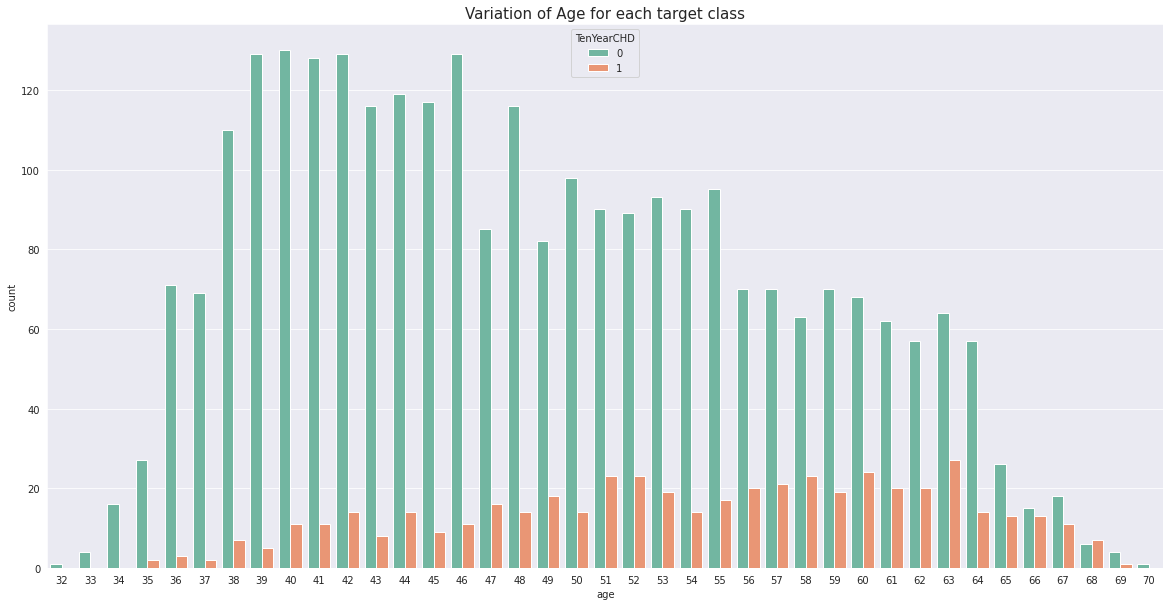

In [28]:
#ploting the countplot for age variable with target class
plt.figure(figsize=(20,10))
sns.countplot(data=cardiovascular_risk, x="age", hue="TenYearCHD",palette="Set2")
plt.title('Variation of Age for each target class',fontsize=15)

**Observation:**
* Here we see that CHD increases from 51 to 67 then decreases.
* Age group (*34 < age < 51*) are at lower risk of        cardiovascular disease.  

**Sex**

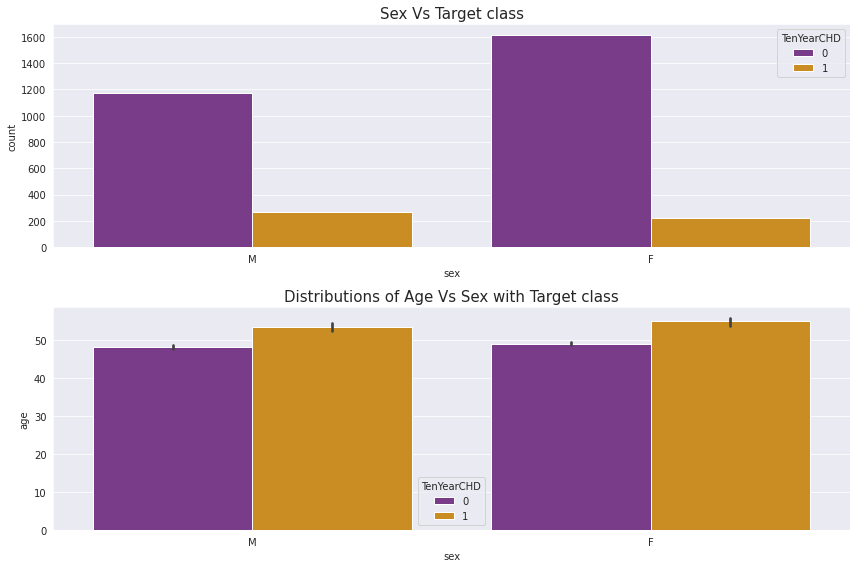

In [29]:
#plt.figure(figsize=(10,5))
fig,ax = plt.subplots(2,2,figsize=(12,8))

#ploting the countplot for sex variable with target class
ax1 = plt.subplot(2,1,1)
sns.countplot(data=cardiovascular_risk,x="sex",hue="TenYearCHD",palette = 'CMRmap')
plt.title("Sex Vs Target class",fontsize=15)

#ploting the barplot between sex variable vs age varibale with target class
ax2 = plt.subplot(2,1,2)
sns.barplot(data=cardiovascular_risk,x="sex", y='age',hue="TenYearCHD",palette = 'CMRmap')
plt.title("Distributions of Age Vs Sex with Target class",fontsize=15)
fig.tight_layout()

**Observation:**
* In the above bar chart we can say that no.of CHD female is less than male.
* In the above bar chart we conclude that male got early CHD as comapared to female.

In [30]:
#Checking male and female counts in the given dataset
cardiovascular_risk.sex.value_counts()

F    1837
M    1435
Name: sex, dtype: int64

**Smoking**<br>

Smoking and other tobacco use is also a significant risk factor for CVD. The harmful substances in tobacco can damage and narrow your blood vessels.

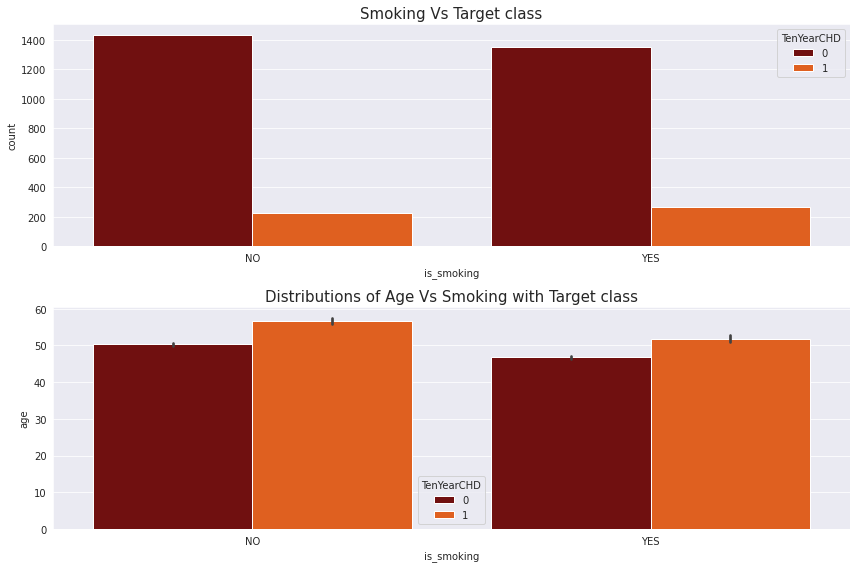

In [31]:
fig,ax = plt.subplots(2,2,figsize=(12,8))

#ploting the countplot for is_smoking variable with target class
ax1 = plt.subplot(2,1,1)
sns.countplot(data=cardiovascular_risk,x="is_smoking",hue="TenYearCHD",palette = 'gist_heat')
plt.title("Smoking Vs Target class",fontsize=15)

#ploting the barplot between is_smoking variable and age variable with target class
ax2 = plt.subplot(2,1,2)
sns.barplot(data=cardiovascular_risk,x="is_smoking", y='age',hue="TenYearCHD",palette = 'gist_heat')
plt.title("Distributions of Age Vs Smoking with Target class",fontsize=15)

fig.tight_layout()

**Observation:**
* As we can see the countplot we can say that no. of patient those who smoke more than as compared to those who won’t.
* As we can see the barplot we can say that those who smoke get early heart disease as compared to those who won’t.


**CigsPerDay**

Smoking only about one cigarette per day carries a risk of developing coronary heart disease and stroke much greater than expected around half that for people who smoke 20 per day. No safe level of smoking exists for cardiovascular disease.

Text(0.5, 1.0, 'Distributions of Sex Vs CigsPerDay with Target class')

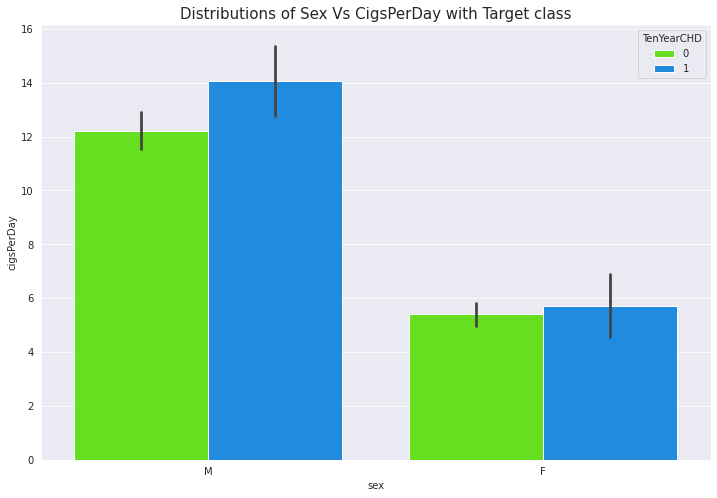

In [32]:
plt.figure(figsize=(12,8))
#smoking_person = cardiovascular_risk.groupby('sex')['cigsPerDay'].sum()

#ploting the barplot between sex variable and cigsPerDay variable with target class
sns.barplot(data=cardiovascular_risk,x="sex", y='cigsPerDay',hue="TenYearCHD",palette = 'gist_rainbow')
plt.title("Distributions of Sex Vs CigsPerDay with Target class",fontsize=15)

**Observation:**
* Above plot shows that number of cigsperday taken by male is more than female.
*  So, in case of male CHD = 1 when he take cigsperday > 12.1 and in case of female CHD = 1 when she take cigsperday > 4.8.

**BMI**<br>
<font color = '#e30267'>The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m².</font>

Being overweight or obese increases your risk of developing diabetes and high blood pressure, both of which are risk factors for CVD.<br>

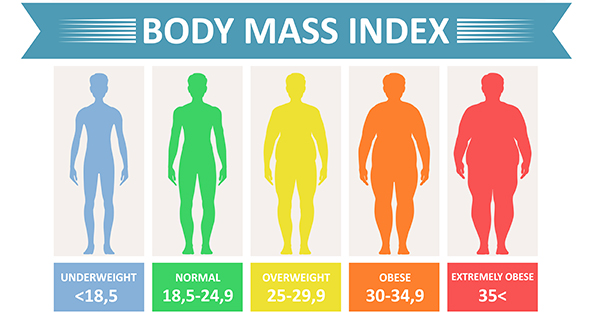
<br>If your BMI is:

* below 18.5 – you're in the underweight range
* between 18.5 and 24.9 – you're in the healthy weight range
* between 25 and 29.9 – you're in the overweight range
* between 30 and 39.9 – you're in the obese range


Text(0.5, 1.0, 'Distributions of BMI Vs Sex with Target class')

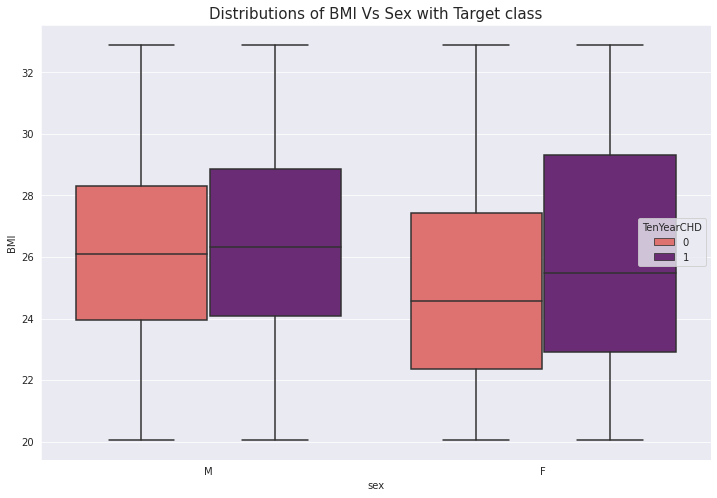

In [33]:
#ploting the boxplot between sex variable and BMI variable with target class
plt.figure(figsize=(12,8))
sns.boxplot(data=cardiovascular_risk,x="sex", y='BMI',hue="TenYearCHD",palette = 'magma_r')
plt.title("Distributions of BMI Vs Sex with Target class",fontsize=15)

**Observation:**
* In above plot we can say that Female BMI is more than male BMI that's leads to overweight.
* so,Female CHD is more than male CHD.

In [ ]:
#maximum BMI
cardiovascular_risk.BMI.unique().max()

32.898999999999994

**Cholesterol**<br>

Cholesterol is a fatty substance found in the blood. If you have high cholesterol, it can cause your blood vessels to narrow and increase your risk of developing a blood clot

* High cholesterol is when you have too much of a fatty substance called cholesterol in your blood.
* It's mainly caused by eating fatty food, not exercising enough, being overweight, smoking and drinking alcohol. It can also run in families.
* You can lower your cholesterol by eating healthily and getting more exercise. Some people also need to take medicine.
*Too much cholesterol can block your blood vessels. It makes you more likely to have heart problems or a stroke.
* High cholesterol does not cause symptoms. You can only find out if you have it from a blood test.

In [34]:
# plt.figure(figsize=(12,8))
# sns.violinplot(data=cardiovascular_risk,x="sex", y='totChol',hue="TenYearCHD",palette = 'seismic')
# plt.title("Distributions of Cholesterol Vs Sex with Target class",fontsize=15)

#ploting the boxplot between sex variable and totChol variable with target class
fig = px.box(cardiovascular_risk, x="sex", y="totChol", color="TenYearCHD")
fig.show()

**Observation:**
* Female has more cholesterol as compared to male. so, it it can cause your blood vessels to narrow and increase your risk of developing a blood clot.
* More cholesterol increases CHD problem.

**Systolic_Bp | Glucose | BMI**

Blood pressure is measured using two numbers: The first number, called **systolic blood pressure**, measures the pressure in your arteries when your heart beats. The second number, called **diastolic blood pressure**, measures the pressure in your arteries when your heart rests between beats.

* **Normal	systolic:** less than 120 mm Hg
* **At Risk (prehypertension)	systolic:** 120–139 mm Hg
* **High Blood Pressure (hypertension)	systolic:** 140 mm Hg or higher
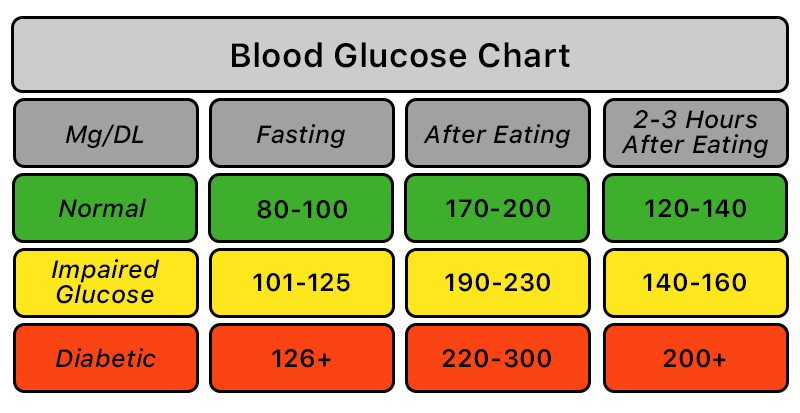

In [35]:
#ploting the 3d_scatterplot between sysBP,glucose and BMI variable with sex variable
fig = px.scatter_3d(cardiovascular_risk, x='sysBP', y='glucose', z='BMI',
              color='sex')
fig.show()

**Observation:**
* High **BMI** cause Overweight/obese that's increases the chance of CHD problem here highest BMI noted is 32.899(Female)

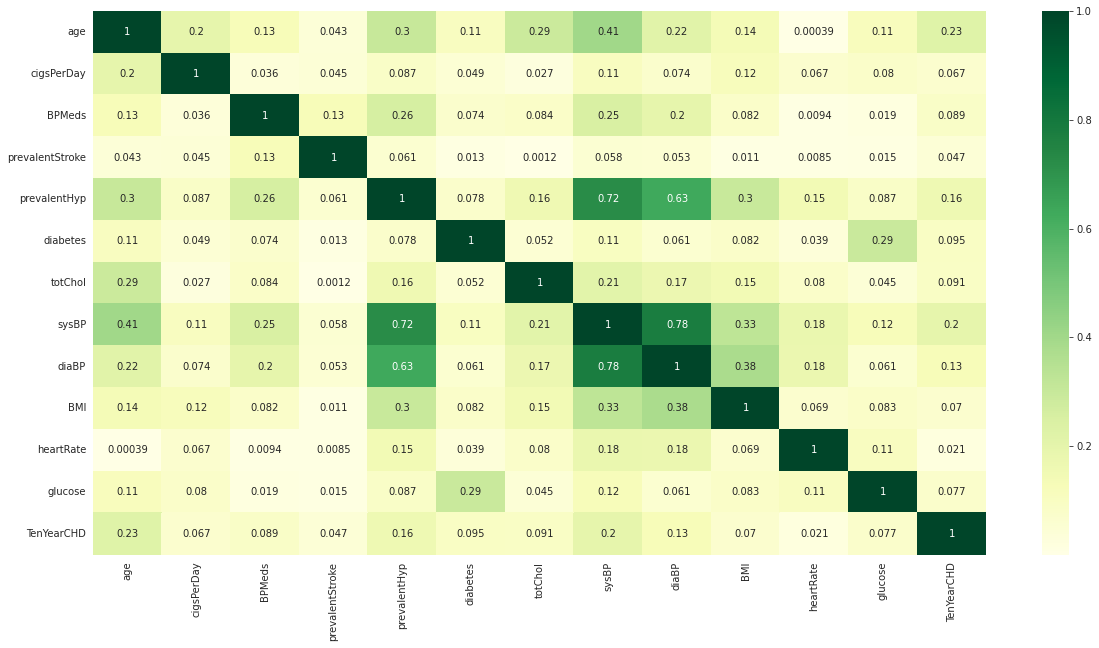

In [36]:
# Checking correlation of each numerical feature
plt.figure(figsize=(20,10))
sns.heatmap(cardiovascular_risk.corr().abs(),annot=True,cmap='YlGn')

**Observation:**
* ‘sysBP’ is moderately correlated with ‘prevalenthyp’, i.e. prevalent hypertension.
* ‘diaBP’ and ‘sysBP’ are somewhat moderately correlated.
* ‘glucose’ level are also moderately correlated to whether patient is diabetic.

## **Label Econding**

In [37]:
#categorical features
#Since, 'sex' and 'is_smoking' columns are in string format. We have to encode them to numerical data type.
categorical_variables = ['sex','is_smoking']

#performing labelencoding
encode = LabelEncoder()
cardiovascular_risk[categorical_variables] = cardiovascular_risk[categorical_variables].apply(lambda X:encode.fit_transform(X))

In [38]:
#first five rows after label encoding
cardiovascular_risk.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,0,0,0.0,0.0,0,1,0,272.0,175.0,104.5,32.80,85.0,65.0,1


## **Dependent and Independent Variables**

In [39]:
#independent variables
x = cardiovascular_risk.drop(columns=['TenYearCHD'])

#dependent variable 
y = cardiovascular_risk['TenYearCHD']

## **Features Selection**

**ExtraTreeClassifiers**<br>

This is a Model-based approach for selecting the features using the tree-based supervised models to make decisions on the importance of the features. The Extra Tree Classifier or the Extremely Random Tree Classifier is an ensemble algorithm that seeds multiple tree models constructed randomly from the training dataset and sorts out the features that have been most voted for. It fits each decision tree on the whole dataset rather than a bootstrap replica and picks out a split point at random to split the nodes.
The splitting of nodes occurring at every level of the constituent decision trees is based on the measure of randomness or entropy in the sub-nodes. The nodes are split on all variables available in the dataset and the split that results in the most homogenous sub-child is selected in the constituent tree models. This lowers the variance and makes the model less prone to overfitting.

In [40]:
#creating object
feature_selection = ExtraTreesClassifier()
feature_selection.fit(x,y)

ExtraTreesClassifier()

In [41]:
#features importance
feature_selection.feature_importances_

array([0.14130201, 0.02482782, 0.01483076, 0.05522514, 0.01007022,
       0.0055725 , 0.02291656, 0.01175384, 0.11860188, 0.13036275,
       0.11988034, 0.11905012, 0.10897416, 0.1166319 ])

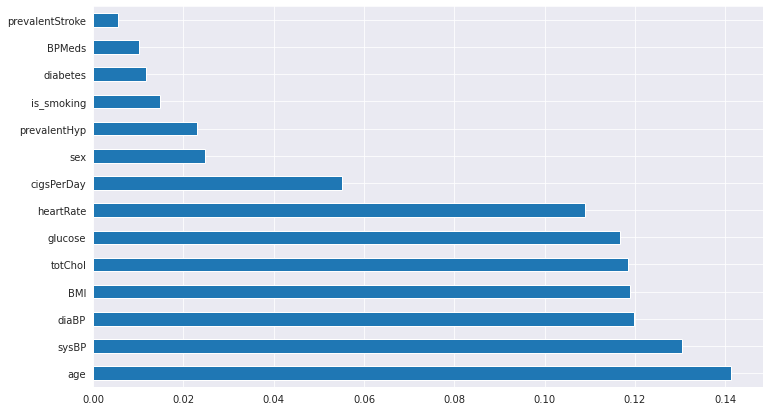

In [42]:
#ploting barh for features importance
plt.figure(figsize=(12,7))
feat_importances = pd.Series(feature_selection.feature_importances_, index=x.columns)    #creating dataframe
feat_importances.nlargest(14).plot(kind='barh')
plt.show()

from the above plot we can say that every features are important

## **Handling Imbalanced data**


When observation in one class is higher than the observation in other classes then there exists a class imbalance. We can clearly see that there is a huge difference between the data set. Solving this issue we use **Synthetic Minority Oversampling Technique (SMOTE)** technique.

This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

SMOTE algorithm works in 4 simple steps:

* Choose a minority class as the input vector
* Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
* Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
* Repeat the steps until data is balanced


In [43]:
smote = SMOTE()         #object creation

# fit predictor and target variable
x_new, y_new = smote.fit_resample(x,y)

print('Original dataset shape', len(cardiovascular_risk))
print('Resampled dataset shape', len(y_new))

Original dataset shape 3272
Resampled dataset shape 5568


In [44]:
#ploting the pieplot using plotly visualization
fig = go.Figure([go.Pie(labels=['Not Having CVD', 'Having CVD'],values=y_new.value_counts().values)])
fig.update_layout(title_text="Pie chart of Target Variable", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(hole=.4,)
fig.show()

## **Train Test Split**

In [45]:
#spliting data into train and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=0)  #Appying the train test split

In [46]:
#shape of train and test dataframe
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(4454, 14) (1114, 14)
(4454,) (1114,)


In [47]:
#Scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## **Evaluation**

In [48]:
#evaluation function
def evaluation(Y,y,y_proba):

  # print(f'Accuracy:\n{accuracy_score(Y, y)}')
  # print()
  # print(f'Confusion Matrix:\n{confusion_matrix(Y, y)}')
  print()
  print(f'Classification Report:\n{classification_report(Y, y)}')
  
  precision = precision_score(Y, y)
  recall = recall_score(Y, y)
  f1Score = f1_score(Y,y)
  accuracy = accuracy_score(Y, y)
  ROC_AUC_Score = roc_auc_score(Y,y_proba)

  return precision,recall,f1Score,accuracy,ROC_AUC_Score

## **Models**

In [49]:
#defining algorithm function
def algorithm(model_name):                             #taking model
  model_obj = model_name
  model_obj.fit(X_train,Y_train)

  y_train_pred = model_obj.predict(X_train)
  y_test_pred  = model_obj.predict(X_test)

  y_train_prob = model_obj.predict_proba(X_train)
  y_test_prob = model_obj.predict_proba(X_test)


  return y_train_pred,y_test_pred, y_train_prob, y_test_prob,model_obj

## **Confusion matrix**

In [50]:
#defining confusion matrix function
def confusion_matrix(model_obj,x,y,cmap='viridis'):
  plot_confusion_matrix(model_obj, x, y,display_labels=['Non CVD','CVD'],cmap=cmap)
  plt.grid(False)                                                                       #omitted the grid

## **Storing Data**

In [51]:
#creating empty dictionary
dict_1,dict_2 = {},{}

In [52]:
#defining storing_eval_data function
def storing_eval_data(model_name,eval_score,flag=None):

  if flag == 0:                                                 #storing training evaluation score when flag=0
    dict_1 = {'Model': model_name,
            'Precision' :round((eval_score[0]),4),
            'Recall':round((eval_score[1]),4),
            'F1-Score':round((eval_score[2]),4),
            'Accuracy':round((eval_score[3]),4),
            'ROC_AUC':round((eval_score[4]),4)
            }
    return dict_1                                              #returning dictionary of training evaluation score

  else:                                                        #storing testing evaluation score when flag = None
    dict_2 = {'Model': model_name,
            'Precision' :round((eval_score[0]),4),
            'Recall':round((eval_score[1]),4),
            'F1-Score':round((eval_score[2]),4),
            'Accuracy':round((eval_score[3]),4),
            'ROC_AUC':round((eval_score[4]),4)
            }
    return dict_2                                             #returning dictionary of testing evaluation score

## **Logistic Regression**

In [53]:
# Applying the LogisticRegression
y_train_pred, y_test_pred,  y_train_prob,  y_test_prob, model_obj = algorithm(LogisticRegression(fit_intercept=True,max_iter=10000))

**Training Set**

In [54]:
#evaluation on training set
eval_score = evaluation(Y_train,y_train_pred,y_train_prob[:,1])


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68      2226
           1       0.68      0.71      0.69      2228

    accuracy                           0.69      4454
   macro avg       0.69      0.69      0.69      4454
weighted avg       0.69      0.69      0.69      4454



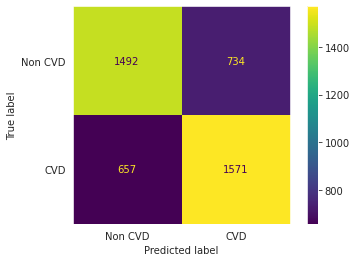

In [55]:
#Visualising the confusion matrix to evaluate the performance of the model on training set
confusion_matrix(model_obj,X_train,Y_train)

**Observation:**<br>
* In the confusion matrix, we see that of the **2226** people that Non CVD, **1492 (67%)** were correctly classified.
* And of the **2228** people that CVD, **1571 (71%)** were correctly classified.


In [56]:
#calling storing_eval_data function
dict_1 = storing_eval_data('Logistic regression',eval_score,0)
training_df=pd.DataFrame(dict_1,index=[1])                                  #storing training evaluation score in dataframe      

In [57]:
#evaluation score
for param,value in dict_1.items():
  if param != 'Model':
    print(f'{param} : {value}')

Precision : 0.6816
Recall : 0.7051
F1-Score : 0.6931
Accuracy : 0.6877
ROC_AUC : 0.7496


**Testing Set**

In [58]:
#evaluation on testing set
eval_score = evaluation(Y_test, y_test_pred, y_test_prob[:,1])


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.67      0.68       558
           1       0.68      0.69      0.68       556

    accuracy                           0.68      1114
   macro avg       0.68      0.68      0.68      1114
weighted avg       0.68      0.68      0.68      1114



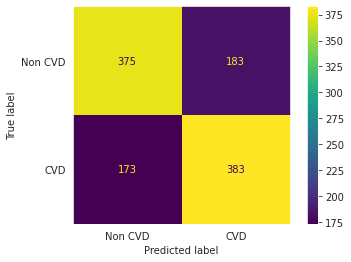

In [59]:
#Visualising the confusion matrix to evaluate the performance of the model on testing set
confusion_matrix(model_obj,X_test,Y_test)

**Observation:**<br>
* In the confusion matrix, we see that of the **558** people that Non CVD, **375 (67%)** were correctly classified.
* And of the **556** people that CVD, **383 (69%)** were correctly classified.


In [60]:
#calling storing_eval_data function
dict_2 = storing_eval_data('Logistic regression',eval_score)
testing_df=pd.DataFrame(dict_2,index=[1])                             #storing testing evalation score in dataframe

In [61]:
#evaluation score
for param,value in dict_2.items():
  if param != 'Model':
    print(f'{param} : {value}')

Precision : 0.6767
Recall : 0.6888
F1-Score : 0.6827
Accuracy : 0.6804
ROC_AUC : 0.7391


## **Decision Tree Classifier**

In [62]:
#Applying the DecisionTree classifier
y_train_pred, y_test_pred, y_train_prob, y_test_prob, model_obj = algorithm(DecisionTreeClassifier(max_depth=5,
                                                                                                   min_samples_split=6,
                                                                                                   min_samples_leaf=8))

**Training Set**

In [63]:
#evaluation on training set
eval_score = evaluation(Y_train,y_train_pred,y_train_prob[:,1])


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.68      0.70      2226
           1       0.70      0.74      0.72      2228

    accuracy                           0.71      4454
   macro avg       0.71      0.71      0.71      4454
weighted avg       0.71      0.71      0.71      4454



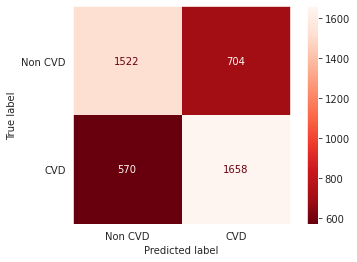

In [64]:
#Visualising the confusion matrix to evaluate the performance of the model on training set
confusion_matrix(model_obj,X_train,Y_train,cmap='Reds_r')

**Observation:**<br>
* In the confusion matrix, we see that of the **2226** people that Non CVD, **1522 (68%)** were correctly classified.
* And of the **2228** people that CVD, **1658 (74%)** were correctly classified.


In [65]:
dict_1 = storing_eval_data('DecisionTree Classifier',eval_score,0)  #storing training evaluation score in dataframe
training_df=training_df.append(dict_1,ignore_index=True)

In [66]:
#evaluation score
for param,value in dict_1.items():
  if param != 'Model':
    print(f'{param} : {value}')

Precision : 0.7019
Recall : 0.7442
F1-Score : 0.7224
Accuracy : 0.714
ROC_AUC : 0.8106


**Testing Set**

In [67]:
#evaluation on testing set
eval_score = evaluation(Y_test,y_test_pred,y_test_prob[:,1])


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       558
           1       0.70      0.71      0.70       556

    accuracy                           0.70      1114
   macro avg       0.70      0.70      0.70      1114
weighted avg       0.70      0.70      0.70      1114



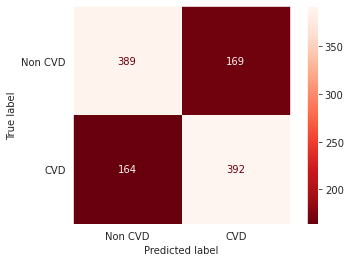

In [68]:
#Visualising the confusion matrix to evaluate the performance of the model on testing set
confusion_matrix(model_obj,X_test,Y_test,cmap='Reds_r')

**Observation:**<br>
* In the confusion matrix, we see that of the **558** people that Non CVD, **389 (70%)** were correctly classified.
* And of the **556** people that CVD, **392 (71%)** were correctly classified.


In [69]:
#storing testing evaluation score
dict_2 = storing_eval_data('DecisionTree Classifier',eval_score)
testing_df=testing_df.append(dict_2,ignore_index=True)      

In [70]:
#evaluation score
for param,value in dict_2.items():
  if param != 'Model':
    print(f'{param} : {value}')

Precision : 0.6988
Recall : 0.705
F1-Score : 0.7019
Accuracy : 0.7011
ROC_AUC : 0.7898


## **RandomForest Classifier**

In [71]:
#Applying the RandomForestClassifier
y_train_pred, y_test_pred, y_train_prob, y_test_prob, model_obj = algorithm(RandomForestClassifier(n_estimators=150,max_depth=6))

**Training Set**

In [72]:
#evaluation on training set
eval_score = evaluation(Y_train,y_train_pred,y_train_prob[:,1])


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      2226
           1       0.76      0.84      0.79      2228

    accuracy                           0.78      4454
   macro avg       0.79      0.78      0.78      4454
weighted avg       0.79      0.78      0.78      4454



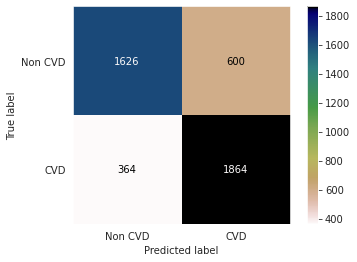

In [73]:
#Visualising the confusion matrix to evaluate the performance of the model on training set
confusion_matrix(model_obj,X_train,Y_train,cmap='gist_earth_r')

**Observation:**<br>
* In the confusion matrix, we see that of the **2226** people that Non CVD, **1626 (73%)** were correctly classified.
* And of the **2228** people that CVD, **1864 (84%)** were correctly classified.


In [74]:
#storing the training evaluation score
dict_1 = storing_eval_data('RandomForest Classifier',eval_score,0)
training_df=training_df.append(dict_1,ignore_index=True)

In [75]:
#evaluation score
for param,value in dict_1.items():
  if param != 'Model':
    print(f'{param} : {value}')

Precision : 0.7565
Recall : 0.8366
F1-Score : 0.7945
Accuracy : 0.7836
ROC_AUC : 0.8727


**Testing Set**

In [76]:
#evaluation on testing set
eval_score = evaluation(Y_test,y_test_pred,y_test_prob[:,1])


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       558
           1       0.71      0.79      0.75       556

    accuracy                           0.74      1114
   macro avg       0.74      0.74      0.73      1114
weighted avg       0.74      0.74      0.73      1114



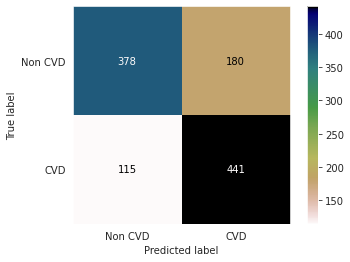

In [77]:
#Visualising the confusion matrix to evaluate the performance of the model on testing set
confusion_matrix(model_obj,X_test,Y_test,cmap='gist_earth_r')

**Observation:**<br>
* In the confusion matrix, we see that of the **558** people that Non CVD, **378 (68%)** were correctly classified.
* And of the **556** people that CVD, **441 (79%)** were correctly classified.


In [78]:
#storing the testing evaluation score
dict_2 = storing_eval_data('RandomForest Classifier',eval_score)
testing_df=testing_df.append(dict_2,ignore_index=True)

In [79]:
#evaluation score
for param,value in dict_2.items():
  if param != 'Model':
    print(f'{param} : {value}')

Precision : 0.7101
Recall : 0.7932
F1-Score : 0.7494
Accuracy : 0.7352
ROC_AUC : 0.8232


## **XGB Classifier**

In [80]:
#Applying the XGB Classifier
y_train_pred, y_test_pred, y_train_prob, y_test_prob, model_obj = algorithm(XGBClassifier())

**Training Set**

In [81]:
#evaluation on training set
eval_score = evaluation(Y_train,y_train_pred,y_train_prob[:,1])


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2226
           1       0.84      0.84      0.84      2228

    accuracy                           0.84      4454
   macro avg       0.84      0.84      0.84      4454
weighted avg       0.84      0.84      0.84      4454



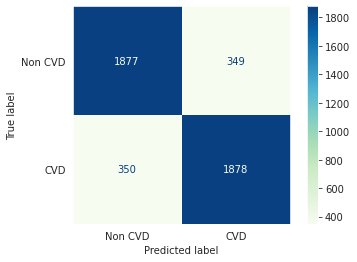

In [82]:
#Visualising the confusion matrix to evaluate the performance of the model on training set
confusion_matrix(model_obj,X_train,Y_train,cmap='GnBu')

**Observation:**<br>
* In the confusion matrix, we see that of the **2226** people that Non CVD, **1877 (84%)** were correctly classified.
* And of the **2228** people that CVD, **1878 (84%)** were correctly classified.


In [83]:
#storing the training evaluation score
dict_1 = storing_eval_data('XGB Classifier',eval_score,0)
training_df=training_df.append(dict_1,ignore_index=True)

In [84]:
#evaluation score
for param,value in dict_1.items():
  if param != 'Model':
    print(f'{param} : {value}')

Precision : 0.8433
Recall : 0.8429
F1-Score : 0.8431
Accuracy : 0.8431
ROC_AUC : 0.9284


**Testing Set**

In [85]:
#evaluation on testing set
eval_score = evaluation(Y_test,y_test_pred,y_test_prob[:,1])


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       558
           1       0.81      0.80      0.81       556

    accuracy                           0.81      1114
   macro avg       0.81      0.81      0.81      1114
weighted avg       0.81      0.81      0.81      1114



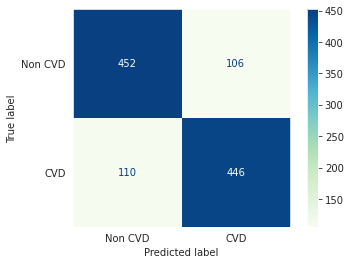

In [86]:
#Visualising the confusion matrix to evaluate the performance of the model on testing set
confusion_matrix(model_obj,X_test,Y_test,cmap='GnBu')

**Observation:**<br>
* In the confusion matrix, we see that of the **558** people that Non CVD, **452 (81%)** were correctly classified.
* And of the **556** people that CVD, **446 (80%)** were correctly classified.


In [87]:
#storing the testing evaluation score
dict_2 = storing_eval_data('XGB Classifier',eval_score)
testing_df=testing_df.append(dict_2,ignore_index=True)       

In [88]:
#evaluation score
for param,value in dict_2.items():
  if param != 'Model':
    print(f'{param} : {value}')

Precision : 0.808
Recall : 0.8022
F1-Score : 0.8051
Accuracy : 0.8061
ROC_AUC : 0.8957


## **KNeighbors Classifier**

In [89]:
#Applying the KNeighborsClassifier
y_train_pred,y_test_pred, y_train_prob, y_test_prob,model_obj = algorithm(KNeighborsClassifier())

**Training Set**

In [90]:
#evaluation on training set
eval_score = evaluation(Y_train,y_train_pred,y_train_prob[:,1])


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.84      2226
           1       0.80      0.95      0.87      2228

    accuracy                           0.86      4454
   macro avg       0.87      0.86      0.86      4454
weighted avg       0.87      0.86      0.86      4454



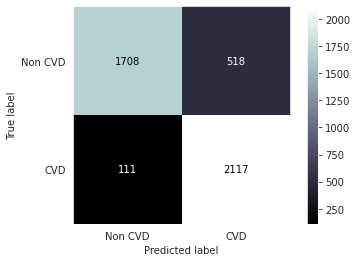

In [91]:
#Visualising the confusion matrix to evaluate the performance of the model on training set
confusion_matrix(model_obj,X_train,Y_train,cmap='bone')

**Observation:**<br>
* In the confusion matrix, we see that of the **2226** people that Non CVD, **1708 (77%)** were correctly classified.
* And of the **2228** people that CVD, **2117 (95%)** were correctly classified.


In [92]:
#storing the training evaluation score
dict_1 = storing_eval_data('KNeighbors Classifier',eval_score,0)
training_df=training_df.append(dict_1,ignore_index=True)     

In [93]:
#evaluation score
for param,value in dict_1.items():
  if param != 'Model':
    print(f'{param} : {value}')

Precision : 0.8034
Recall : 0.9502
F1-Score : 0.8707
Accuracy : 0.8588
ROC_AUC : 0.9553


**Testing Set**

In [94]:
#evaluation on testing test
eval_score = evaluation(Y_test,y_test_pred,y_test_prob[:,1])


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.65      0.75       558
           1       0.72      0.92      0.81       556

    accuracy                           0.78      1114
   macro avg       0.80      0.78      0.78      1114
weighted avg       0.80      0.78      0.78      1114



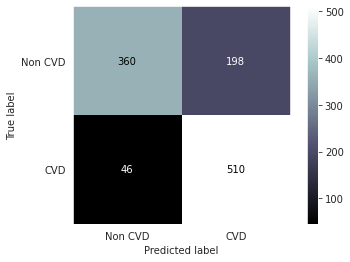

In [95]:
#Visualising the confusion matrix to evaluate the performance of the model on testing set
confusion_matrix(model_obj,X_test,Y_test,cmap='bone')

**Observation:**<br>
* In the confusion matrix, we see that of the **558** people that Non CVD, **360 (65%)** were correctly classified.
* And of the **556** people that CVD, **510 (92%)** were correctly classified.


In [96]:
#storing the testing evaluation score
dict_2 = storing_eval_data('KNeighbors Classifier',eval_score)
testing_df=testing_df.append(dict_2,ignore_index=True)

In [97]:
#evaluation score
for param,value in dict_2.items():
  if param != 'Model':
    print(f'{param} : {value}')

Precision : 0.7203
Recall : 0.9173
F1-Score : 0.807
Accuracy : 0.781
ROC_AUC : 0.8678


## **Support Vector Machine**

In [98]:
#Applying the SVC
y_train_pred, y_test_pred, y_train_prob, y_test_prob, model_obj = algorithm(SVC(probability=True))

**Training Set**

In [99]:
#evaluation on training set
eval_score = evaluation(Y_train,y_train_pred,y_train_prob[:,1])


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      2226
           1       0.75      0.80      0.77      2228

    accuracy                           0.77      4454
   macro avg       0.77      0.77      0.77      4454
weighted avg       0.77      0.77      0.77      4454



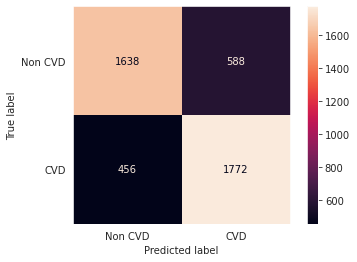

In [100]:
#Visualising the confusion matrix to evaluate the performance of the model on training set
confusion_matrix(model_obj,X_train,Y_train,cmap='rocket')

**Observation:**<br>
* In the confusion matrix, we see that of the **2226** people that Non CVD, **1638 (74%)** were correctly classified.
* And of the **2228** people that CVD, **1772 (80%)** were correctly classified.

In [101]:
#storing training evaluation score
dict_1 = storing_eval_data('SVC Classifier',eval_score,0)
training_df=training_df.append(dict_1,ignore_index=True)

In [102]:
#evaluation score
for param,value in dict_1.items():
  if param != 'Model':
    print(f'{param} : {value}')

Precision : 0.7508
Recall : 0.7953
F1-Score : 0.7724
Accuracy : 0.7656
ROC_AUC : 0.853


**Testing Set**

In [103]:
#evaluation on testing set
eval_score = evaluation(Y_test,y_test_pred,y_test_prob[:,1])


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       558
           1       0.72      0.76      0.74       556

    accuracy                           0.73      1114
   macro avg       0.74      0.73      0.73      1114
weighted avg       0.74      0.73      0.73      1114



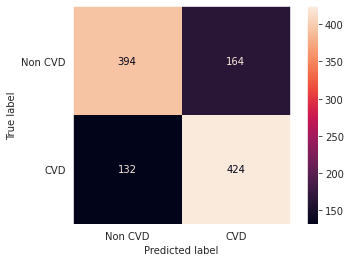

In [104]:
#Visualising the confusion matrix to evaluate the performance of the model on testing set
confusion_matrix(model_obj,X_test,Y_test,cmap='rocket')

**Observation:**<br>
* In the confusion matrix, we see that of the **558** people that Non CVD, **394 (71%)** were correctly classified.
* And of the **556** people that CVD, **424 (76%)** were correctly classified.


In [105]:
#storing testing evaluation score
dict_2 = storing_eval_data('SVC Classifier',eval_score)
testing_df=testing_df.append(dict_2,ignore_index=True)

In [106]:
#evaluation score
for param,value in dict_2.items():
  if param != 'Model':
    print(f'{param} : {value}')

Precision : 0.7211
Recall : 0.7626
F1-Score : 0.7413
Accuracy : 0.7343
ROC_AUC : 0.8169


## **Conclusion**

In [107]:
#concating training and testing dataframe
result=pd.concat([training_df,testing_df],keys=['Training set','Testing set'])
result

Model  Precision  Recall  F1-Score  \
Training set 0      Logistic regression     0.6816  0.7051    0.6931   
             1  DecisionTree Classifier     0.7019  0.7442    0.7224   
             2  RandomForest Classifier     0.7565  0.8366    0.7945   
             3           XGB Classifier     0.8433  0.8429    0.8431   
             4    KNeighbors Classifier     0.8034  0.9502    0.8707   
             5           SVC Classifier     0.7508  0.7953    0.7724   
Testing set  0      Logistic regression     0.6767  0.6888    0.6827   
             1  DecisionTree Classifier     0.6988  0.7050    0.7019   
             2  RandomForest Classifier     0.7101  0.7932    0.7494   
             3           XGB Classifier     0.8080  0.8022    0.8051   
             4    KNeighbors Classifier     0.7203  0.9173    0.8070   
             5           SVC Classifier     0.7211  0.7626    0.7413   

                Accuracy  ROC_AUC  
Training set 0    0.6877   0.7496  
             1    0.7140   0.8106  
             2    0.7836   0.8727  
             3    0.8431   0.9284  
             4    0.8588   0.9553  
             5    0.7656   0.8530  
Testing set  0    0.6804   0.7391  
             1    0.7011   0.7898  
             2    0.7352   0.8232  
             3    0.8061   0.8957  
             4    0.7810   0.8678  
             5    0.7343   0.8169

In [ ]:
# training_df.sort_values(by='Accuracy' , ascending = False).style.background_gradient(cmap='coolwarm')\
# .bar(subset=["ROC_AUC",], color='#6495ED')\
# .bar(subset=["Recall"], color='#ff355d')\
# .bar(subset=["Precision"], color='lightseagreen')\
# .bar(subset=["F1-Score"], color='orange')

In [ ]:
# testing_df.sort_values(by='Accuracy' , ascending = False).style.background_gradient(cmap='coolwarm')\
# .bar(subset=["ROC_AUC",], color='#6495ED')\
# .bar(subset=["Recall"], color='#ff355d')\
# .bar(subset=["Precision"], color='lightseagreen')\
# .bar(subset=["F1-Score"], color='orange')

In [108]:
#collecting data from result dataframe
roc_auc = result.ROC_AUC.to_list()                       #roc_auc score
accuracy = result.Accuracy.to_list()                     #accuracyscore
precision = result.Precision.to_list()                   #pecision score
recall = result.Recall.to_list()	                       #recall score   
f1_score = result['F1-Score'].to_list()                  #f1-score 
model = result.Model.to_list()                           #model name
training_testing = ['Training'] * 6 + ['Testing'] * 6    #creating new column of string(training and testing)

In [109]:
#creating dataframe to compare the model
comparing_model_df = pd.DataFrame({'model' : model,'precision':precision,'recall':recall,'f1-score':f1_score,
                                   'accuracy': accuracy,'roc_auc' : roc_auc,'train_test' :training_testing})

In [110]:
#comparing the models
fig = px.bar(comparing_model_df,y='model',x='roc_auc',color='train_test',
             hover_data=['accuracy','precision','recall','f1-score'],barmode='group')
fig.show()

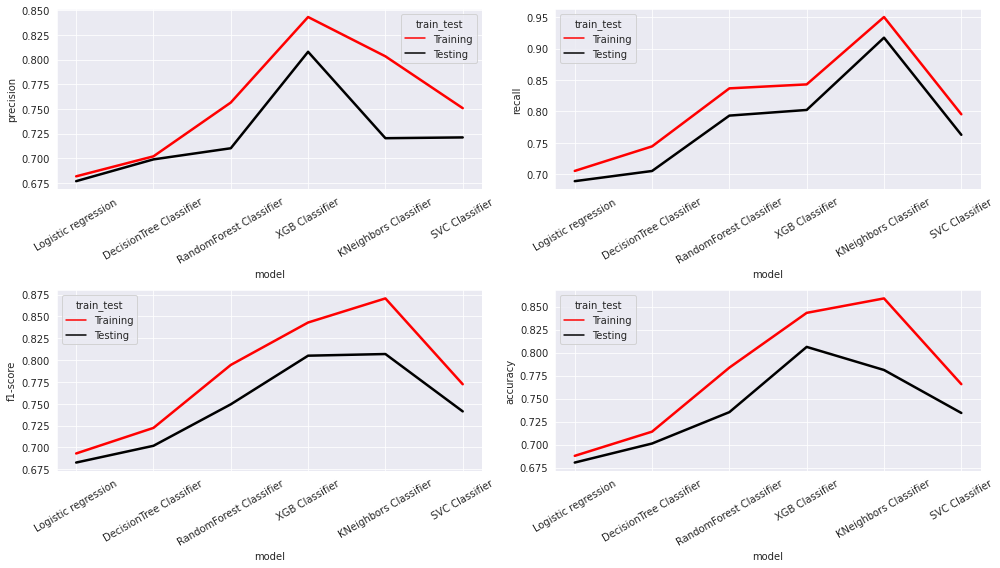

In [111]:
#ploting lineplot for precision,recall,f1-score and accuracy
score_list = ['precision','recall','f1-score','accuracy']
fig,ax = plt.subplots(2,2,figsize=(14,8))
for i in range(4):
  ax1 = plt.subplot(2,2,i+1)
  plt.xticks(rotation=30)
  sns.lineplot(data = comparing_model_df, x ='model', y= score_list[i], hue='train_test', palette=['r', 'black'], linewidth=2.5)
  fig.tight_layout()                                                                                 # set the spacing between subplots                                                             

**Observations:**<br>
* In the above Models Evaluation Table(Testing set) our auc-roc score is more 0.80 except Logistic regression and Decision Tree.So we can say that our model predicted the classes in a good manner.
* **XGB Classifier** are performing well which has best Recall,Precision,F1-Score and Accuracy Score.